# 1. 원본 파일 불러오기


In [100]:
# 사용할 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# 사용할 공공데이터 파일 불러오기
# 필요한 칼럼만 선택하여 추출함
# 스킵할 행이 없기 때문에 skiprows 생략
# thousands, delimiter 생략

rain_probability_07 = pd.read_csv(
    "./data/forecast_data/rain_probability_July.csv",
    encoding="cp949",
    usecols=[0, 1, 3],
    names=["day", "hour", "rain_rate"],
    header=0,
)

temp_1hour_07 = pd.read_csv(
    "./data/forecast_data/temp_1hour_July.csv",
    encoding="cp949",
    usecols=[0, 1, 3],
    names=["day", "hour", "temp"],
    header=0,
)

historical_07 = pd.read_csv(
    "./data/historical_data/historical.csv",
    encoding="cp949",
    header=0,
    usecols=[2, 3, 4, 6, 8],
    names=["day", "avg_temp", "min_temp", "max_temp", "rain"],
)

# 2. 불러온 파일 살펴보기


# - 각 파일의 처음부터 5번째까지의 데이터


In [102]:
rain_probability_07.head()

,day,hour,rain_rate
0,11,200.0,30.0
1,11,200.0,30.0
2,11,200.0,30.0
3,11,200.0,30.0
4,11,200.0,30.0


In [103]:
temp_1hour_07.head()

,day,hour,temp
0,1,200.0,30.0
1,1,200.0,29.0
2,1,200.0,28.0
3,1,200.0,27.0
4,1,200.0,26.0


In [104]:
historical_07.head()

,day,avg_temp,min_temp,max_temp,rain
0,2024-07-01,26.3,22.0,31.3,NaN
1,2024-07-02,23.2,21.9,25.2,65.1
2,2024-07-03,24.7,23.6,25.9,0.8
3,2024-07-04,26.8,23.2,30.6,3.6
4,2024-07-05,23.4,21.3,26.1,4.1


# - 각 파일의 끝에서부터 5번째까지의 데이터


In [105]:
rain_probability_07.tail()

,day,hour,rain_rate
167964,-971917344,2300.0,0.0
167965,-971917344,2300.0,0.0
167966,-971917344,2300.0,0.0
167967,-971917344,2300.0,0.0
167968,-971917344,2300.0,0.0


In [106]:
temp_1hour_07.tail()

,day,hour,temp
15773,31,2300.0,29.0
15774,31,2300.0,29.0
15775,31,2300.0,28.0
15776,31,2300.0,28.0
15777,31,2300.0,28.0


In [107]:
historical_07.tail()

,day,avg_temp,min_temp,max_temp,rain
26,2024-07-27,28.9,27.5,31.7,33.5
27,2024-07-28,29.2,27.3,32.2,0.0
28,2024-07-29,27.4,26.8,27.8,0.0
29,2024-07-30,28.6,26.3,31.9,NaN
30,2024-07-31,29.4,27.0,33.3,NaN


# - 각 파일의 컬럼명 확인


In [108]:
rain_probability_07.columns

Index(['day', 'hour', 'rain_rate'], dtype='object')

In [109]:
temp_1hour_07.columns

Index(['day', 'hour', 'temp'], dtype='object')

In [110]:
historical_07.columns

Index(['day', 'avg_temp', 'min_temp', 'max_temp', 'rain'], dtype='object')

# - 데이터 정보 파악하기


In [111]:
rain_probability_07.describe(include="all")

,day,hour,rain_rate
count,167969,167640.000000,167640.000000
unique,361,NaN,NaN
top,11,NaN,NaN
freq,5588,NaN,NaN
mean,NaN,1260.629921,17.080142
std,NaN,662.098083,19.134843
min,NaN,200.000000,0.000000
25%,NaN,800.000000,0.000000
50%,NaN,1250.000000,20.000000
75%,NaN,1700.000000,30.000000


In [112]:
temp_1hour_07.describe(include="all")

,day,hour,temp
count,15778,15748.000000,15748.000000
unique,61,NaN,NaN
top,1,NaN,NaN
freq,508,NaN,NaN
mean,NaN,1260.629921,26.067882
std,NaN,662.117131,5.262479
min,NaN,200.000000,0.000000
25%,NaN,800.000000,25.000000
50%,NaN,1250.000000,27.000000
75%,NaN,1700.000000,28.000000


In [113]:
historical_07.describe(include="all")

,day,avg_temp,min_temp,max_temp,rain
count,31,31.000000,31.000000,31.000000,26.000000
unique,31,NaN,NaN,NaN,NaN
top,2024-07-01,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,26.596774,24.106452,29.641935,21.434615
std,NaN,1.815761,1.802949,2.537554,34.019229
min,NaN,23.200000,21.300000,24.500000,0.000000
25%,NaN,25.250000,22.700000,27.850000,0.500000
50%,NaN,26.600000,24.100000,30.600000,4.800000
75%,NaN,28.250000,25.300000,31.500000,24.250000


In [114]:
rain_probability_07.info()  # 데이터의 종류 및 수량 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167969 entries, 0 to 167968
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   day        167969 non-null  object 
 1   hour       167640 non-null  float64
 2   rain_rate  167640 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.8+ MB


In [115]:
temp_1hour_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15778 entries, 0 to 15777
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     15778 non-null  object 
 1   hour    15748 non-null  float64
 2   temp    15748 non-null  float64
dtypes: float64(2), object(1)
memory usage: 369.9+ KB


In [116]:
historical_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   day       31 non-null     object 
 1   avg_temp  31 non-null     float64
 2   min_temp  31 non-null     float64
 3   max_temp  31 non-null     float64
 4   rain      26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.3+ KB


In [117]:
rain_probability_07.value_counts(normalize=True, sort=False)  # 데이터 길이 확인

day         hour    rain_rate
-971917344  200.0   0.0          0.003675
            500.0   0.0          0.003478
            800.0   0.0          0.004856
            1100.0  0.0          0.004659
            1400.0  0.0          0.004462
                                   ...   
9           2300.0  20.0         0.000638
                    30.0         0.000597
                    60.0         0.000286
                    63.0         0.000012
                    64.0         0.000006
Name: proportion, Length: 2764, dtype: float64

In [118]:
temp_1hour_07.value_counts(normalize=True, sort=False)

day         hour    temp
-971917344  200.0   0.0     0.003556
            500.0   0.0     0.003366
            800.0   0.0     0.004699
            1100.0  0.0     0.004509
            1400.0  0.0     0.004318
                              ...   
9           2300.0  28.0    0.000445
                    29.0    0.000254
                    30.0    0.000381
                    31.0    0.000381
                    32.0    0.000191
Name: proportion, Length: 1739, dtype: float64

In [119]:
historical_07.value_counts(normalize=True, sort=False)

day         avg_temp  min_temp  max_temp  rain 
2024-07-02  23.2      21.9      25.2      65.1     0.038462
2024-07-03  24.7      23.6      25.9      0.8      0.038462
2024-07-04  26.8      23.2      30.6      3.6      0.038462
2024-07-05  23.4      21.3      26.1      4.1      0.038462
2024-07-06  25.1      22.1      30.0      2.8      0.038462
2024-07-07  24.4      21.5      28.2      28.7     0.038462
2024-07-08  23.8      23.1      24.5      21.1     0.038462
2024-07-09  24.5      22.7      26.7      0.3      0.038462
2024-07-10  26.6      22.7      31.1      1.4      0.038462
2024-07-13  28.1      23.5      33.3      0.0      0.038462
2024-07-14  28.4      24.9      32.1      0.4      0.038462
2024-07-15  28.4      24.5      31.3      0.0      0.038462
2024-07-16  27.0      24.6      30.7      17.0     0.038462
2024-07-17  25.4      24.1      28.1      98.8     0.038462
2024-07-18  24.3      23.1      25.6      128.8    0.038462
2024-07-19  27.0      24.2      30.8      0.1      0

# 3. 7월(장마철)의 강수 확률 데이터 재설정


# - 데이터 활용 전 전처리 작업


In [120]:
rain_probability_07.dtypes  # 데이터 종류의 변환이 필요한 열 확인

day           object
hour         float64
rain_rate    float64
dtype: object

In [121]:
# object 형식인 day 열의 데이터를 숫자형으로 변환

rain_probability_07["day"] = pd.to_numeric(rain_probability_07["day"], errors="coerce")
rain_probability_07.head(10)

,day,hour,rain_rate
0,11.0,200.0,30.0
1,11.0,200.0,30.0
2,11.0,200.0,30.0
3,11.0,200.0,30.0
4,11.0,200.0,30.0
5,11.0,200.0,30.0
6,11.0,200.0,30.0
7,11.0,200.0,30.0
8,11.0,200.0,0.0
9,11.0,200.0,0.0


In [122]:
# 데이터 형식의 변환이 완료되었는지 확인

rain_probability_07.dtypes

day          float64
hour         float64
rain_rate    float64
dtype: object

In [123]:
# 음수로 표기된 값들을 결측치로 변환
# loc 에 조건문을 대입하여 해당 열 검색 후 처리

rain_probability_07.loc[rain_probability_07["day"] < 0, "day"] = pd.NA

In [124]:
# 변환이 완료됐는지 확인

rain_probability_07[500:510]

,day,hour,rain_rate
500,11.0,2300.0,20.0
501,11.0,2300.0,0.0
502,11.0,2300.0,0.0
503,11.0,2300.0,0.0
504,11.0,2300.0,0.0
505,11.0,2300.0,0.0
506,11.0,2300.0,0.0
507,11.0,2300.0,0.0
508,NaN,NaN,NaN
509,2.0,200.0,30.0


# - 데이터 활용하기


In [125]:
# 하루 최고 강수 확률이 40% 이상이면 비가 올 것으로 예상
# .max 사용하여 최고 강수 확률 계산

max_rain_rate = rain_probability_07.groupby("day")["rain_rate"].max().reset_index()
max_rain_rate

,day,rain_rate
0,1.0,100.0
1,2.0,90.0
2,3.0,84.0
3,4.0,90.0
4,5.0,99.0
5,6.0,95.0
6,7.0,100.0
7,8.0,100.0
8,9.0,64.0
9,10.0,75.0


In [126]:
# 칼럼명 변경

max_rain_rate.rename(columns={"rain_rate": "max_rain_rate_p"}, inplace=True)
max_rain_rate.head()

,day,max_rain_rate_p
0,1.0,100.0
1,2.0,90.0
2,3.0,84.0
3,4.0,90.0
4,5.0,99.0


In [127]:
# 데이터를 날짜 형식으로 변환하기 위해 날짜 인덱스 제작

start_date1 = pd.Timestamp("2024-07-01")
date_time_idx1 = start_date1 + pd.to_timedelta(
    max_rain_rate["day"] - 1, unit="d"
)  # (날짜열 데이터) -1 값을 가져옴, unit = "d" -> 단위를 하루로 설정

date_time_idx1

0    2024-07-01
1    2024-07-02
2    2024-07-03
3    2024-07-04
4    2024-07-05
5    2024-07-06
6    2024-07-07
7    2024-07-08
8    2024-07-09
9    2024-07-10
10   2024-07-11
11   2024-07-12
12   2024-07-13
13   2024-07-14
14   2024-07-15
15   2024-07-16
16   2024-07-17
17   2024-07-18
18   2024-07-19
19   2024-07-20
20   2024-07-21
21   2024-07-22
22   2024-07-23
23   2024-07-24
24   2024-07-25
25   2024-07-26
26   2024-07-27
27   2024-07-28
28   2024-07-29
29   2024-07-30
30   2024-07-31
Name: day, dtype: datetime64[ns]

In [128]:
# 생성한 날짜 인덱스를 기존 데이터 프레임에 추가

max_rain_rate.set_index([date_time_idx1], inplace=True)
max_rain_rate.head()

,day,max_rain_rate_p
day,,
2024-07-01,1.0,100.0
2024-07-02,2.0,90.0
2024-07-03,3.0,84.0
2024-07-04,4.0,90.0
2024-07-05,5.0,99.0


In [129]:
# 칼럼명이 중복됨을 확인, 기존 day 칼럼 삭제
# 삭제후의 데이터 프레임 확인

max_rain_rate.drop(max_rain_rate.columns[0], axis=1, inplace=True)
max_rain_rate.head()

,max_rain_rate_p
day,
2024-07-01,100.0
2024-07-02,90.0
2024-07-03,84.0
2024-07-04,90.0
2024-07-05,99.0


In [130]:
# 최고 강수 확률 중 40% 초과인 값들은 비가 올 것으로 예상함
# 40% 초과인 값들을 True로 표시하는 rain 칼럼 제작

max_rain_rate["rain_p"] = max_rain_rate["max_rain_rate_p"] > 40
max_rain_rate

,max_rain_rate_p,rain_p
day,,
2024-07-01,100.0,True
2024-07-02,90.0,True
2024-07-03,84.0,True
2024-07-04,90.0,True
2024-07-05,99.0,True
2024-07-06,95.0,True
2024-07-07,100.0,True
2024-07-08,100.0,True
2024-07-09,64.0,True


# 데이터 저장하기


In [131]:
# 변형이 완료된 데이터 프레임을 csv 파일로 저장

# max_rain_rate.to_csv('./data/edited_data/rain_rate_07.csv', index = True, encoding = 'cp949')

# 4. 7월(장마철)의 시간당 기온 데이터 재설정


# - 데이터 활용 전 전처리 작업


In [132]:
# 데이터의 자료 종류 확인

temp_1hour_07.dtypes

day      object
hour    float64
temp    float64
dtype: object

In [133]:
# object 형식인 day, hour 열의 데이터를 숫자형으로 변환


temp_1hour_07["day"] = pd.to_numeric(temp_1hour_07["day"], errors="coerce")
temp_1hour_07["hour"] = pd.to_numeric(temp_1hour_07["hour"], errors="coerce")
temp_1hour_07.head()

,day,hour,temp
0,1.0,200.0,30.0
1,1.0,200.0,29.0
2,1.0,200.0,28.0
3,1.0,200.0,27.0
4,1.0,200.0,26.0


In [134]:
# 해당 열의 데이터 종류가 변경되었는지 확인

temp_1hour_07.dtypes

day     float64
hour    float64
temp    float64
dtype: object

In [135]:
# 음수로 표기된 값들을 결측치로 변환
# loc 에 조건문을 대입하여 해당 열 검색 후 처리

temp_1hour_07.loc[temp_1hour_07["day"] < 0, "day"] = pd.NA
temp_1hour_07[10:15]

,day,hour,temp
10,1.0,200.0,24.0
11,1.0,200.0,24.0
12,1.0,200.0,24.0
13,1.0,200.0,24.0
14,1.0,200.0,24.0


In [136]:
# 하루 내의 같은 시각 당 발표 데이터 확인

temp_1hour_07[(temp_1hour_07["day"] == 1.0) & (temp_1hour_07["hour"] == 200.0)][:5]

,day,hour,temp
0,1.0,200.0,30.0
1,1.0,200.0,29.0
2,1.0,200.0,28.0
3,1.0,200.0,27.0
4,1.0,200.0,26.0


In [137]:
# 결측값의 수량 및 합계 계산

(len(temp_1hour_07) - temp_1hour_07.count()).sum()

np.int64(598)

In [138]:
# 결측값을 확인

temp_1hour_07[12216:12226]

,day,hour,temp
12216,NaN,200.0,0.0
12217,NaN,200.0,0.0
12218,NaN,200.0,0.0
12219,NaN,200.0,0.0
12220,NaN,200.0,0.0
12221,NaN,200.0,0.0
12222,NaN,200.0,0.0
12223,NaN,200.0,0.0
12224,NaN,200.0,0.0
12225,NaN,200.0,0.0


In [139]:
# 각 열에 존재하는 결측값 삭제

temp_1hour_07.dropna(inplace=True)
temp_1hour_07[12216:12226]

,day,hour,temp
12749,26.0,200.0,31.0
12750,26.0,200.0,30.0
12751,26.0,200.0,30.0
12752,26.0,200.0,29.0
12753,26.0,200.0,29.0
12754,26.0,200.0,29.0
12755,26.0,200.0,29.0
12756,26.0,200.0,28.0
12757,26.0,200.0,28.0
12758,26.0,200.0,28.0


# - 데이터 활용하기


In [140]:
# 데이터를 날짜 형식으로 변환하기 위해 날짜 인덱스 제작


start_date2 = pd.Timestamp("2024-07-01")
date_time_idx2 = start_date2 + pd.to_timedelta(temp_1hour_07["day"] - 1, unit="d")
date_time_idx2

0       2024-07-01
1       2024-07-01
2       2024-07-01
3       2024-07-01
4       2024-07-01
           ...    
15773   2024-07-31
15774   2024-07-31
15775   2024-07-31
15776   2024-07-31
15777   2024-07-31
Name: day, Length: 15240, dtype: datetime64[ns]

In [141]:
# 데이터를 시간 형식으로 변환하기 위해 시간 인덱스 제작

time_idx = pd.to_timedelta((temp_1hour_07["hour"] // 100).astype(int), unit="h")
time_idx

0       0 days 02:00:00
1       0 days 02:00:00
2       0 days 02:00:00
3       0 days 02:00:00
4       0 days 02:00:00
              ...      
15773   0 days 23:00:00
15774   0 days 23:00:00
15775   0 days 23:00:00
15776   0 days 23:00:00
15777   0 days 23:00:00
Name: hour, Length: 15240, dtype: timedelta64[ns]

In [142]:
# 제작한 인덱스를 기존 데이터에 적용

temp_1hour_07.set_index([date_time_idx2, time_idx], inplace=True)
temp = temp_1hour_07[["temp"]]
temp

temp
day        hour                 
2024-07-01 0 days 02:00:00  30.0
           0 days 02:00:00  29.0
           0 days 02:00:00  28.0
           0 days 02:00:00  27.0
           0 days 02:00:00  26.0
...                          ...
2024-07-31 0 days 23:00:00  29.0
           0 days 23:00:00  29.0
           0 days 23:00:00  28.0
           0 days 23:00:00  28.0
           0 days 23:00:00  28.0

[15240 rows x 1 columns]

In [143]:
# 기온의 평균 구하기

avg_temp = temp.groupby(level=0).mean()
avg_temp.rename(columns={"temp": "avg_temp_p"}, inplace=True)
avg_temp

,avg_temp_p
day,
2024-07-01,24.379921
2024-07-02,25.039370
2024-07-03,25.986220
2024-07-04,25.984252
2024-07-05,25.637795
2024-07-06,25.312992
2024-07-07,25.309055
2024-07-08,25.415354
2024-07-09,26.366142


In [144]:
# 최고 기온 구하기

max_temp = temp.groupby(level=0).max()
max_temp.rename(columns={"temp": "max_temp_p"}, inplace=True)
max_temp

,max_temp_p
day,
2024-07-01,30.0
2024-07-02,29.0
2024-07-03,30.0
2024-07-04,30.0
2024-07-05,29.0
2024-07-06,29.0
2024-07-07,28.0
2024-07-08,30.0
2024-07-09,32.0


In [145]:
# 최저 기온 구하기

min_temp = temp.groupby(level=0).min()
min_temp.rename(columns={"temp": "min_temp_p"}, inplace=True)
min_temp

,min_temp_p
day,
2024-07-01,22.0
2024-07-02,23.0
2024-07-03,23.0
2024-07-04,23.0
2024-07-05,23.0
2024-07-06,23.0
2024-07-07,23.0
2024-07-08,22.0
2024-07-09,22.0


In [146]:
# concat 사용하여 구한 값들 결합

total_temp = pd.concat([avg_temp, max_temp, min_temp], axis=1)
total_temp

,avg_temp_p,max_temp_p,min_temp_p
day,,,
2024-07-01,24.379921,30.0,22.0
2024-07-02,25.039370,29.0,23.0
2024-07-03,25.986220,30.0,23.0
2024-07-04,25.984252,30.0,23.0
2024-07-05,25.637795,29.0,23.0
2024-07-06,25.312992,29.0,23.0
2024-07-07,25.309055,28.0,23.0
2024-07-08,25.415354,30.0,22.0
2024-07-09,26.366142,32.0,22.0


# - 데이터 저장하기


In [147]:
# total_temp.to_csv("./data/edited_data/avg_max_min_temp_07.csv", index = True, encoding = 'cp949')

# 5. 7월(장마철)의 실제 관측 데이터 재설정


# - 데이터 활용하기


In [148]:
# boolean 형식의 데이터를 가진 rain 칼럼 제작
historical_07["rain"] = historical_07["rain"].astype(bool)

# 강수량이 0 초과면 강우를 뜻하는 True, 0 이하면 False
historical_07.loc[historical_07["rain"] > 0, "rain"] = True
historical_07.loc[historical_07["rain"] <= 0, "rain"] = False

# 결측치가 존재하면 False 값으로 채우기
historical_07["rain"] = historical_07["rain"].fillna(False)

# day 칼럼을 날짜 형식으로 변환
historical_07["day"] = pd.to_datetime(historical_07["day"])

# day 칼럼을 인덱스 레이블로 설정
historical_07.set_index("day", inplace=True)
historical_07

,avg_temp,min_temp,max_temp,rain
day,,,,
2024-07-01,26.3,22.0,31.3,True
2024-07-02,23.2,21.9,25.2,True
2024-07-03,24.7,23.6,25.9,True
2024-07-04,26.8,23.2,30.6,True
2024-07-05,23.4,21.3,26.1,True
2024-07-06,25.1,22.1,30.0,True
2024-07-07,24.4,21.5,28.2,True
2024-07-08,23.8,23.1,24.5,True
2024-07-09,24.5,22.7,26.7,True


# - 데이터 저장하기


In [149]:
# historical_07.to_csv("./data/edited_data/historical_avg_min_max_rain_07.csv")

# 6. 수정한 데이터 활용하기


# - 수정한 데이터 프레임 결합하기


In [150]:
# 실제 관측 데이터와 강수 확률 데이터 결합

merged = pd.merge(historical_07, max_rain_rate, on="day", how="outer")
merged.head()

,avg_temp,min_temp,max_temp,rain,max_rain_rate_p,rain_p
day,,,,,,
2024-07-01,26.3,22.0,31.3,True,100.0,True
2024-07-02,23.2,21.9,25.2,True,90.0,True
2024-07-03,24.7,23.6,25.9,True,84.0,True
2024-07-04,26.8,23.2,30.6,True,90.0,True
2024-07-05,23.4,21.3,26.1,True,99.0,True


In [151]:
# 기온 예보 데이터와 추가로 결합

final_merged = pd.merge(merged, total_temp, on="day", how="outer")
final_merged

,avg_temp,min_temp,max_temp,rain,max_rain_rate_p,rain_p,avg_temp_p,max_temp_p,min_temp_p
day,,,,,,,,,
2024-07-01,26.3,22.0,31.3,True,100.0,True,24.379921,30.0,22.0
2024-07-02,23.2,21.9,25.2,True,90.0,True,25.039370,29.0,23.0
2024-07-03,24.7,23.6,25.9,True,84.0,True,25.986220,30.0,23.0
2024-07-04,26.8,23.2,30.6,True,90.0,True,25.984252,30.0,23.0
2024-07-05,23.4,21.3,26.1,True,99.0,True,25.637795,29.0,23.0
2024-07-06,25.1,22.1,30.0,True,95.0,True,25.312992,29.0,23.0
2024-07-07,24.4,21.5,28.2,True,100.0,True,25.309055,28.0,23.0
2024-07-08,23.8,23.1,24.5,True,100.0,True,25.415354,30.0,22.0
2024-07-09,24.5,22.7,26.7,True,64.0,True,26.366142,32.0,22.0


# - 결합한 데이터 프레임 저장하기


In [152]:
# final_merged.to_csv("./data/edited_data/final_merged_July.csv")

# - 결합한 데이터 프레임 살펴보기


In [153]:
final_merged.shape

(31, 9)

In [154]:
final_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2024-07-01 to 2024-07-31
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_temp         31 non-null     float64
 1   min_temp         31 non-null     float64
 2   max_temp         31 non-null     float64
 3   rain             31 non-null     bool   
 4   max_rain_rate_p  31 non-null     float64
 5   rain_p           31 non-null     bool   
 6   avg_temp_p       30 non-null     float64
 7   max_temp_p       30 non-null     float64
 8   min_temp_p       30 non-null     float64
dtypes: bool(2), float64(7)
memory usage: 2.0 KB


In [155]:
final_merged.describe(include="all")

,avg_temp,min_temp,max_temp,rain,max_rain_rate_p,rain_p,avg_temp_p,max_temp_p,min_temp_p
count,31.000000,31.000000,31.000000,31,31.000000,31,30.000000,30.000000,30.000000
unique,NaN,NaN,NaN,2,NaN,1,NaN,NaN,NaN
top,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN
freq,NaN,NaN,NaN,27,NaN,31,NaN,NaN,NaN
mean,26.596774,24.106452,29.641935,NaN,89.064516,NaN,26.936811,31.266667,24.200000
std,1.815761,1.802949,2.537554,NaN,13.779055,NaN,1.393856,1.874205,1.494819
min,23.200000,21.300000,24.500000,NaN,60.000000,NaN,24.379921,28.000000,22.000000
25%,25.250000,22.700000,27.850000,NaN,84.000000,NaN,25.931102,30.000000,23.000000
50%,26.600000,24.100000,30.600000,NaN,95.000000,NaN,26.517717,30.500000,24.000000
75%,28.250000,25.300000,31.500000,NaN,100.000000,NaN,27.955709,33.000000,26.000000


# - 결합한 데이터 프레임 활용하기


In [156]:
# 최고 기온을 기록한 날짜 구하기

max_temp_value = final_merged["max_temp"].max()
hottest_day = final_merged.query("max_temp == @max_temp_value")[
    ["max_temp"]
]  # @를 사용해 변수로 인식시킴
hottest_day

,max_temp
day,
2024-07-13,33.3
2024-07-31,33.3


In [157]:
# 최저 기온을 기록한 날짜 구하기

min_temp_value = final_merged["min_temp"].max()
coldest_day = final_merged.query("min_temp == @min_temp_value")[["min_temp"]]
coldest_day

,min_temp
day,
2024-07-27,27.5


In [158]:
# 최저 기온과 최고 기온의 중간값 각각 구하기

final_merged[["min_temp", "max_temp"]].median()

min_temp    24.1
max_temp    30.6
dtype: float64

In [159]:
# 최고 기온의 평균과 최저 기온의 평균값 각각 구하기

final_merged[["min_temp", "max_temp"]].mean()

min_temp    24.106452
max_temp    29.641935
dtype: float64

In [160]:
# 각 날짜의 평균 기온을 통해 7월 전체 기온의 평균값 구하기

all_avg_temp = final_merged["avg_temp"].mean()
all_avg_temp

np.float64(26.596774193548388)

In [161]:
# 실제로 비가 내렸던 날 구하기

rainy_day = final_merged.query("rain == True")[["rain"]]

print("비가 내린 날짜 목록\n")
print(rainy_day.index)

print("\n7월 중 비가 내린 날의 수\n")
print(len(rainy_day))

비가 내린 날짜 목록

DatetimeIndex(['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04',
               '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08',
               '2024-07-09', '2024-07-10', '2024-07-11', '2024-07-12',
               '2024-07-14', '2024-07-16', '2024-07-17', '2024-07-18',
               '2024-07-19', '2024-07-20', '2024-07-21', '2024-07-22',
               '2024-07-23', '2024-07-24', '2024-07-25', '2024-07-26',
               '2024-07-27', '2024-07-30', '2024-07-31'],
              dtype='datetime64[ns]', name='day', freq=None)

7월 중 비가 내린 날의 수

27


In [162]:
# 비가 내린 날의 목록을 데이터 프레임 형식으로 확인

rainy_day

,rain
day,
2024-07-01,True
2024-07-02,True
2024-07-03,True
2024-07-04,True
2024-07-05,True
2024-07-06,True
2024-07-07,True
2024-07-08,True
2024-07-09,True


In [163]:
# 비가 내리지 않은 날 구하기

not_rainy_day = final_merged[final_merged["rain"] == False]
print("비가 내리지 않은 날짜 목록\n")
print(not_rainy_day.index)

print("\n7월 중 비가 내리지 않은 날의 수\n")
print(len(not_rainy_day))

비가 내리지 않은 날짜 목록

DatetimeIndex(['2024-07-13', '2024-07-15', '2024-07-28', '2024-07-29'], dtype='datetime64[ns]', name='day', freq=None)

7월 중 비가 내리지 않은 날의 수

4


In [164]:
# 각 날짜의 일교차를 구하고, 일교차를 데이터 프레임의 원하는 위치에 삽입

final_merged["temp_gap"] = final_merged["max_temp"] - final_merged["min_temp"]
final_merged = final_merged[
    [
        "avg_temp",
        "min_temp",
        "max_temp",
        "temp_gap",
        "rain",
        "max_rain_rate_p",
        "rain_p",
        "avg_temp_p",
        "max_temp_p",
        "min_temp_p",
    ]
]
final_merged

,avg_temp,min_temp,max_temp,temp_gap,rain,max_rain_rate_p,rain_p,avg_temp_p,max_temp_p,min_temp_p
day,,,,,,,,,,
2024-07-01,26.3,22.0,31.3,9.3,True,100.0,True,24.379921,30.0,22.0
2024-07-02,23.2,21.9,25.2,3.3,True,90.0,True,25.039370,29.0,23.0
2024-07-03,24.7,23.6,25.9,2.3,True,84.0,True,25.986220,30.0,23.0
2024-07-04,26.8,23.2,30.6,7.4,True,90.0,True,25.984252,30.0,23.0
2024-07-05,23.4,21.3,26.1,4.8,True,99.0,True,25.637795,29.0,23.0
2024-07-06,25.1,22.1,30.0,7.9,True,95.0,True,25.312992,29.0,23.0
2024-07-07,24.4,21.5,28.2,6.7,True,100.0,True,25.309055,28.0,23.0
2024-07-08,23.8,23.1,24.5,1.4,True,100.0,True,25.415354,30.0,22.0
2024-07-09,24.5,22.7,26.7,4.0,True,64.0,True,26.366142,32.0,22.0


In [165]:
# 일교차가 가장 컸던 날

temp_gap_value1 = final_merged["temp_gap"].max()
max_temp_gap_day = final_merged.query("temp_gap == @temp_gap_value1")[["temp_gap"]]
max_temp_gap_day

,temp_gap
day,
2024-07-13,9.8


In [166]:
# 일교차가 가장 작았던 날

temp_gap_value2 = final_merged["temp_gap"].min()
min_temp_gap_day = final_merged.query("temp_gap == @temp_gap_value2")[["temp_gap"]]
min_temp_gap_day

,temp_gap
day,
2024-07-29,1.0


In [167]:
# 일교차의 평균값 구하기

final_merged[["temp_gap"]].mean()

temp_gap    5.535484
dtype: float64

In [168]:
# 강우 예보가 적중한 날 구하기

rain_match_row = final_merged[final_merged["rain"] == final_merged["rain_p"]]
rain_match_row

,avg_temp,min_temp,max_temp,temp_gap,rain,max_rain_rate_p,rain_p,avg_temp_p,max_temp_p,min_temp_p
day,,,,,,,,,,
2024-07-01,26.3,22.0,31.3,9.3,True,100.0,True,24.379921,30.0,22.0
2024-07-02,23.2,21.9,25.2,3.3,True,90.0,True,25.039370,29.0,23.0
2024-07-03,24.7,23.6,25.9,2.3,True,84.0,True,25.986220,30.0,23.0
2024-07-04,26.8,23.2,30.6,7.4,True,90.0,True,25.984252,30.0,23.0
2024-07-05,23.4,21.3,26.1,4.8,True,99.0,True,25.637795,29.0,23.0
2024-07-06,25.1,22.1,30.0,7.9,True,95.0,True,25.312992,29.0,23.0
2024-07-07,24.4,21.5,28.2,6.7,True,100.0,True,25.309055,28.0,23.0
2024-07-08,23.8,23.1,24.5,1.4,True,100.0,True,25.415354,30.0,22.0
2024-07-09,24.5,22.7,26.7,4.0,True,64.0,True,26.366142,32.0,22.0


In [169]:
# 강우 예보가 적중한 날의 수

len(rain_match_row)

27

In [170]:
# 7월 강우 예보가 적중한 % 확률 구하기

len(rain_match_row) / len(final_merged["rain_p"]) * 100

87.09677419354838

In [171]:
# 7월 강우 예보가 틀린 % 확률 구하기

(len(final_merged["rain_p"]) - len(rain_match_row)) / len(final_merged["rain_p"]) * 100

12.903225806451612

In [172]:
# 기온의 차이가 3 이상일 시 기온 예보가 틀렸다고 지정
# 최고 기온 예보가 틀린 행 찾기

incorrect_max_temp_forecasts = final_merged[
    abs(final_merged["max_temp"] - final_merged["max_temp_p"]) >= 3
]
incorrect_max_temp_forecasts

,avg_temp,min_temp,max_temp,temp_gap,rain,max_rain_rate_p,rain_p,avg_temp_p,max_temp_p,min_temp_p
day,,,,,,,,,,
2024-07-02,23.2,21.9,25.2,3.3,True,90.0,True,25.039370,29.0,23.0
2024-07-03,24.7,23.6,25.9,2.3,True,84.0,True,25.986220,30.0,23.0
2024-07-08,23.8,23.1,24.5,1.4,True,100.0,True,25.415354,30.0,22.0
2024-07-09,24.5,22.7,26.7,4.0,True,64.0,True,26.366142,32.0,22.0
2024-07-10,26.6,22.7,31.1,8.4,True,75.0,True,27.267717,35.0,23.0
2024-07-11,25.7,23.3,28.9,5.6,True,75.0,True,27.490157,33.0,23.0
2024-07-18,24.3,23.1,25.6,2.5,True,100.0,True,26.466535,30.0,24.0
2024-07-22,26.6,24.3,27.9,3.6,True,84.0,True,27.675197,34.0,26.0
2024-07-23,26.4,25.8,27.3,1.5,True,89.0,True,28.834646,34.0,26.0


In [173]:
# 최고 기온 예보가 틀린 % 확률
len(incorrect_max_temp_forecasts) / len(final_merged["max_temp"]) * 100

32.25806451612903

In [174]:
# 최저 기온 예보가 틀린 행 찾기

incorrect_min_temp_forecasts = final_merged[
    abs(final_merged["min_temp"] - final_merged["min_temp_p"]) >= 3
]
incorrect_min_temp_forecasts

,avg_temp,min_temp,max_temp,temp_gap,rain,max_rain_rate_p,rain_p,avg_temp_p,max_temp_p,min_temp_p
day,,,,,,,,,,
2024-07-21,26.5,22.5,29.8,7.3,True,84.0,True,27.181102,30.0,26.0


In [175]:
# 최저 기온 예보가 틀린 % 확률
len(incorrect_min_temp_forecasts) / len(final_merged["min_temp"]) * 100

3.225806451612903

In [176]:
# 평균 기온 예보가 틀린 행 찾기 -> 존재하지 않음

incorrect_avg_temp_forecasts = final_merged[
    abs(final_merged["avg_temp"] - final_merged["avg_temp_p"]) >= 3
]
incorrect_avg_temp_forecasts

,avg_temp,min_temp,max_temp,temp_gap,rain,max_rain_rate_p,rain_p,avg_temp_p,max_temp_p,min_temp_p
day,,,,,,,,,,


# 7. 데이터 시각화


‼ 필요한 데이터는 각 파트 분할해서 사용해주세요 ‼️


In [177]:
import matplotlib

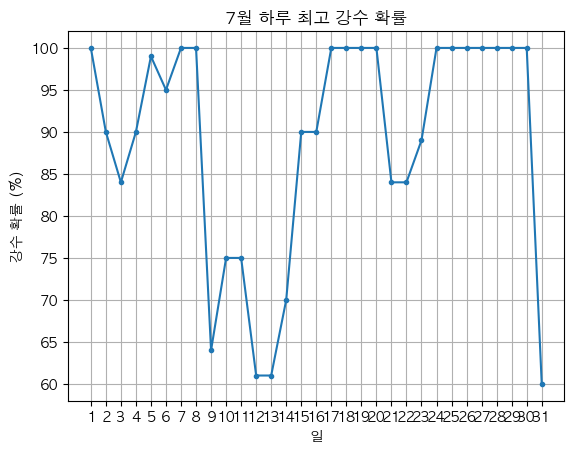

In [178]:
# 1. 하루 최고 강수 확률 데이터로 그래프 그리기

matplotlib.rc("font", family="AppleGothic")
plt.rcParams["axes.unicode_minus"] = False

x = max_rain_rate.index.day
y = max_rain_rate["max_rain_rate_p"]

plt.plot(x, y, marker=".", linestyle="-")

plt.title("7월 하루 최고 강수 확률")
plt.xlabel("일")
plt.xticks(ticks=range(1, 32), labels=range(1, 32))
plt.ylabel("강수 확률 (%)")
plt.grid(True)
plt.show()

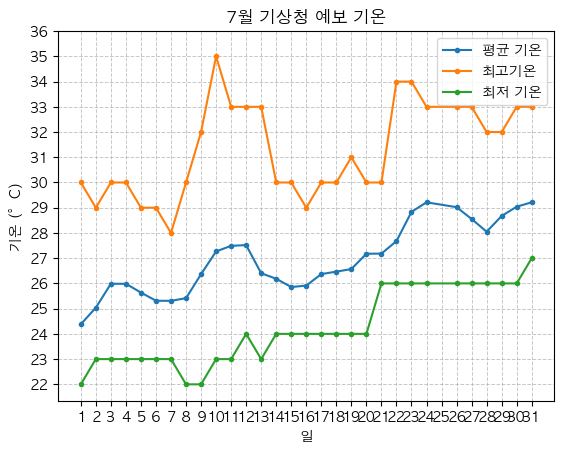

In [179]:
# 2. 예보 기온데이터 평균 / 최고 / 최저

matplotlib.rc("font", family="AppleGothic")
plt.rcParams["axes.unicode_minus"] = False

x = total_temp.index.day
y_avg = total_temp.avg_temp_p
y_max = total_temp.max_temp_p
y_min = total_temp.min_temp_p

plt.plot(x, y_avg, marker=".", linestyle="-", label="평균 기온")
plt.plot(x, y_max, marker=".", linestyle="-", label="최고기온")
plt.plot(x, y_min, marker=".", linestyle="-", label="최저 기온")

plt.title("7월 기상청 예보 기온")

plt.xlabel("일")
plt.xticks(ticks=range(1, 32), labels=range(1, 32))
y_min_value = int(total_temp.min().min())  # 최저 기온 중 최솟값
y_max_value = int(total_temp.max().max()) + 1  # 최고 기온 중 최댓값 + 1
plt.yticks(ticks=range(y_min_value, y_max_value + 1, 1))  # 1도 간격으로 y축 눈금 설정

plt.ylabel("기온 (°C)")

plt.grid(True, which="major", linestyle="--", linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()

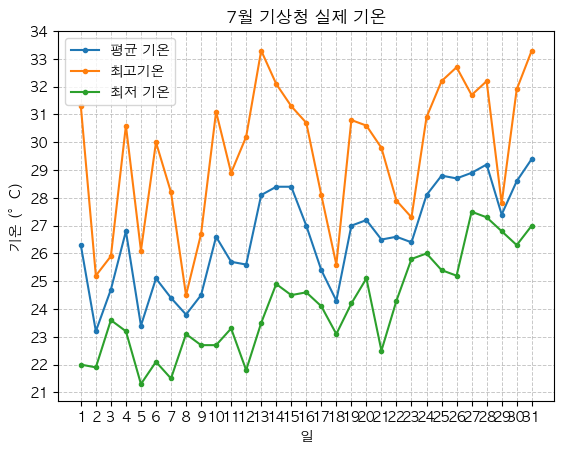

In [180]:
# 3. 실제 기온데이터 평균 / 최고 / 최저

matplotlib.rc("font", family="AppleGothic")
plt.rcParams["axes.unicode_minus"] = False

x = historical_07.index.day
y_avg = historical_07.avg_temp
y_max = historical_07.max_temp
y_min = historical_07.min_temp

plt.plot(x, y_avg, marker=".", linestyle="-", label="평균 기온")
plt.plot(x, y_max, marker=".", linestyle="-", label="최고기온")
plt.plot(x, y_min, marker=".", linestyle="-", label="최저 기온")

plt.title("7월 기상청 실제 기온")

plt.xlabel("일")
plt.xticks(ticks=range(1, 32), labels=range(1, 32))
y_min_value = int(historical_07.min_temp.min())  # 최저 기온 중 최솟값
y_max_value = int(historical_07.max_temp.max()) + 1  # 최고 기온 중 최댓값 + 1
plt.yticks(ticks=range(y_min_value, y_max_value + 1, 1))  # 1도 간격으로 y축 눈금 설정

plt.ylabel("기온 (°C)")

plt.grid(True, which="major", linestyle="--", linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()

In [181]:
len(rain_match_row.index)

27

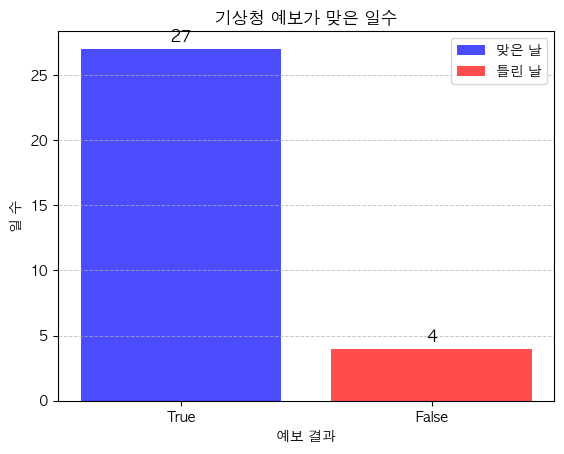

In [182]:
# 3. 예보 T / F 바형 그래프

matplotlib.rc("font", family="AppleGothic")
plt.rcParams["axes.unicode_minus"] = False

x_True = ["True"]  # True의 x축 라벨
x_False = ["False"]  # False의 x축 라벨
y_True = [len(rain_match_row)]  # True의 y축 값
y_False = [len(not_rainy_day)]  # False의 y축 값


# True에 대한 막대 그래프
plt.bar(x_True, y_True, color="blue", alpha=0.7, label="맞은 날")
plt.text(x=x_True[0], y=y_True[0] + 0.5, s=str(y_True[0]), ha="center", fontsize=12)
# False에 대한 막대 그래프
plt.bar(x_False, y_False, color="red", alpha=0.7, label="틀린 날")
plt.text(x=x_False[0], y=y_False[0] + 0.5, s=str(y_False[0]), ha="center", fontsize=12)

plt.title("기상청 예보가 맞은 일수")
plt.xlabel("예보 결과")
plt.ylabel("일 수")

plt.grid(axis="y", which="major", linestyle="--", linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()

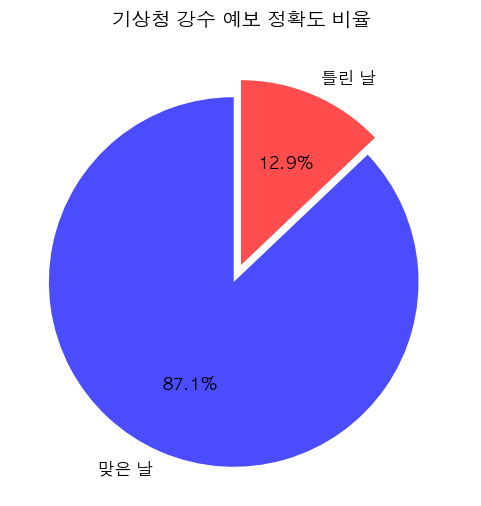

In [184]:
import matplotlib.pyplot as plt

# 데이터 준비
labels = ["맞은 날", "틀린 날"]  # 라벨
sizes = [len(rain_match_row), len(not_rainy_day)]  # 각 카테고리 값
colors = ["blue", "red"]  # 색상
explode = (0.1, 0)  # 강조 설정 (True 강조)

# 원그래프 생성
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    startangle=90,
    textprops={"fontsize": 12},
    wedgeprops={"alpha": 0.7},
)

plt.title("기상청 강수 예보 정확도 비율", fontsize=14)
plt.show()

In [185]:
def make_pie(cor, wrg, title):
    # 데이터 준비
    labels = ["맞은 날", "틀린 날"]  # 라벨
    sizes = [cor, wrg]  # 각 카테고리 값
    colors = ["blue", "red"]  # 색상
    explode = (0.1, 0)  # 강조 설정 (True 강조)

    # 원그래프 생성
    plt.figure(figsize=(6, 6))
    plt.pie(
        sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        startangle=90,
        textprops={"fontsize": 12},
        wedgeprops={"alpha": 0.7},
    )

    plt.title(f"기상청 {title} 예보 정확도 비율", fontsize=14)
    plt.show()
    return

In [187]:
incorrect_rain_forecasts = final_merged[final_merged["rain"] != final_merged["rain_p"]]
incorrect_rain_forecasts

,avg_temp,min_temp,max_temp,temp_gap,rain,max_rain_rate_p,rain_p,avg_temp_p,max_temp_p,min_temp_p
day,,,,,,,,,,
2024-07-13,28.1,23.5,33.3,9.8,False,61.0,True,26.401575,33.0,23.0
2024-07-15,28.4,24.5,31.3,6.8,False,90.0,True,25.856299,30.0,24.0
2024-07-28,29.2,27.3,32.2,4.9,False,100.0,True,28.049213,32.0,26.0
2024-07-29,27.4,26.8,27.8,1.0,False,100.0,True,28.673228,32.0,26.0


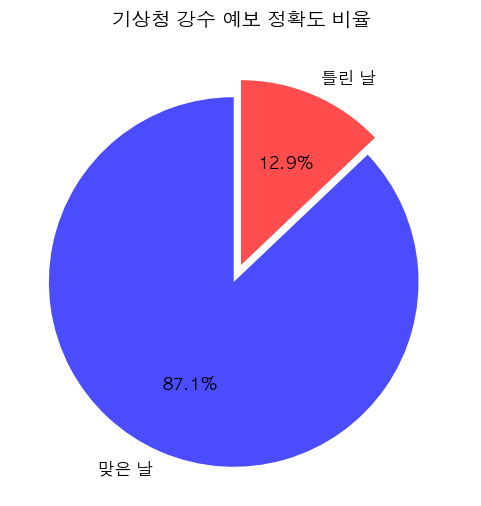

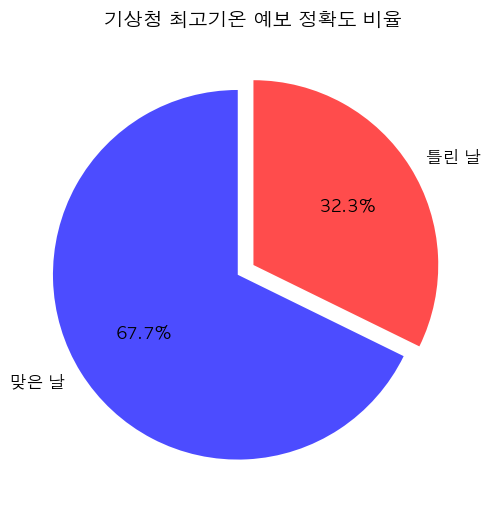

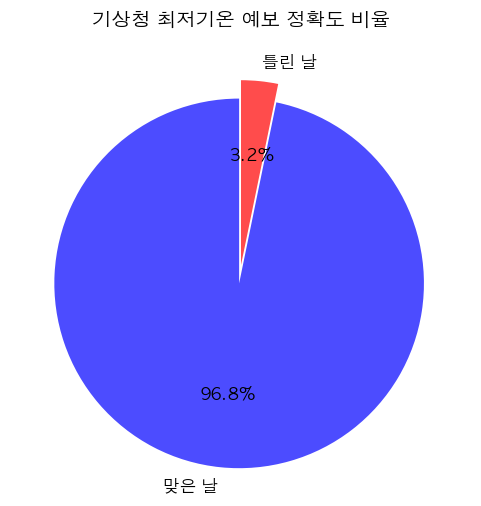

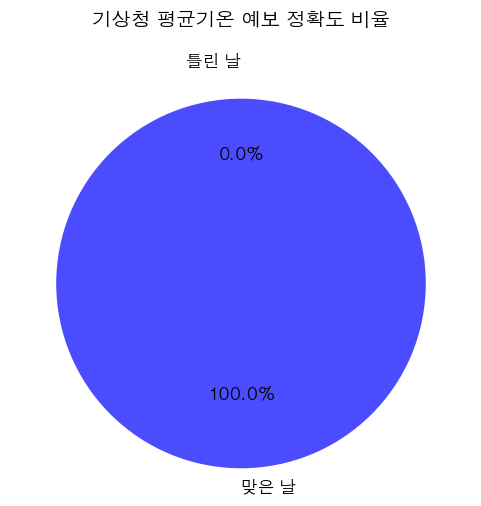

In [ ]:
want_to_make_pie = [
    [incorrect_rain_forecasts, "강수"],
    [incorrect_max_temp_forecasts, "최고기온"],
    [incorrect_min_temp_forecasts, "최저기온"],
    [incorrect_avg_temp_forecasts, "평균기온"],
]

for data, title in want_to_make_pie:
    make_pie(31 - len(data), len(data), title)